<a href="https://colab.research.google.com/github/Brunour/VentaInmueblesCABA/blob/main/PropertiesPriceWhithML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real Estate Price Prediction

**Project Description**

This project aims to predict property prices in Buenos Aires, Argentina by analyzing data on real estate and surrounding features. Using machine learning models, it examines the relationship between prices and factors like location, infrastructure, and security.

**Geographical Focus**

The analysis is focused solely on properties in Buenos Aires, Argentina, considering data specific to the city's neighborhoods and local conditions.

**Technologies and Libraries Used**

* **CSV**: Format of the dataset used.
* **Python**: Main language for data analysis.
* **Pandas and Numpy**: Data manipulation and analysis.
* **Matplotlib and Seaborn**: Data visualization.
* **Scikit-learn**: Machine learning model development and training.

## 1.Workspace setup

### Link Google Drive to the environment

In [31]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import libraries

In [32]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

### Load the dataset from Google Drive

This database will be the main one on which the project will be based, and new tables will be added later to strengthen the analysis.

In [33]:
# Give the name "properties" to dataset

properties = pd.read_csv('/content/drive/My Drive/properties_buenosaires.csv')

### Start visualizing the DataFrame information

In [34]:
# The function "head" show us the first 5 lines of the dataset

properties.head()

,Type,Description,Bedrooms,Bathroom,Area,Neighborhood,Disctrict,Price
0,Apartment,Apartment on sale,3,2,70,Villa Devoto,Disctrict 11,360000000
1,House,House on sale,4,3,170,La Boca,Disctrict 4,670000000
2,Apartment,Apartment on sale,3,3,144,San Nicolas,Disctrict 1,1120000000
3,Apartment,Apartment on sale,3,2,154,Recoleta,Disctrict 2,890000000
4,Apartment,Apartment on sale,2,3,128,La Paternal,Disctrict 15,970000000


In [35]:
# Function "shape" da la cantidad de filas y columnas respectivamente

properties.shape

(9519, 8)

In [36]:
# Name of the columns

properties.columns

Index(['Type', 'Description', 'Bedrooms', 'Bathroom', 'Area', 'Neighborhood',
       'Disctrict', 'Price'],
      dtype='object')

In [37]:
# Type of data witch conform the data set

properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9519 entries, 0 to 9518
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          9519 non-null   object
 1   Description   9519 non-null   object
 2   Bedrooms      9519 non-null   int64 
 3   Bathroom      9519 non-null   int64 
 4   Area          9519 non-null   int64 
 5   Neighborhood  9519 non-null   object
 6   Disctrict     9519 non-null   object
 7   Price         9519 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 595.1+ KB


In [38]:
# With the function "iloc" + a random id, show us the information of this propertie id

properties.iloc[300]

,300
Type,Apartment
Description,Apartment on sale
Bedrooms,2
Bathroom,1
Area,42
Neighborhood,San Telmo
Disctrict,Disctrict 1
Price,116100000


In [39]:
# Same of the last celd, now in for as a range

properties.iloc[300:305]

,Type,Description,Bedrooms,Bathroom,Area,Neighborhood,Disctrict,Price
300,Apartment,Apartment on sale,2,1,42,San Telmo,Disctrict 1,116100000
301,Apartment,Apartment on sale,2,2,95,Villa Riachuelo,Disctrict 8,980000000
302,Apartment,Apartment on sale,3,2,54,Balvanera,Disctrict 3,237000000
303,Apartment,Apartment on sale,3,2,67,Parque Avellaneda,Disctrict 9,320000000
304,Apartment,Apartment on sale,4,4,132,Villa Santa Rita,Disctrict 11,530000000


In [40]:
# Average area (m²) of the analyzed properties

properties.Area.mean()

146.67444059249922

In [41]:
# The "sample" function returns 10 random records

properties.sample(10)

,Type,Description,Bedrooms,Bathroom,Area,Neighborhood,Disctrict,Price
2855,Apartment,Apartment on sale,3,1,47,Puerto Madero,Disctrict 1,125500000
9446,Apartment,Apartment on sale,3,1,48,Chacarita,Disctrict 15,155000000
9219,Apartment,Apartment on sale,3,3,172,Villa del Parque,Disctrict 11,799000000
3171,House,House on sale,9,6,311,Colegiales,Disctrict 13,1300000000
8114,House,House on sale,5,3,195,Villa Real,Disctrict 10,350000000
6363,Apartment,Apartment on sale,2,3,160,Villa Urquiza,Disctrict 12,870000000
5893,Apartment,Apartment on sale,2,2,78,Recoleta,Disctrict 2,510000000
6418,Apartment,Apartment on sale,3,4,273,Parque Patricios,Disctrict 4,1950000000
5330,Apartment,Apartment on sale,3,1,47,Parque Patricios,Disctrict 4,125500000
900,Apartment,Apartment on sale,2,2,55,Parque Patricios,Disctrict 4,198000000


In [42]:
# Table showing neighborhoods with the most properties for sale in descending order

properties.Neighborhood.value_counts()

,count
Neighborhood,
Agronomia,224
Parque Chacabuco,221
San Nicolas,219
Villa Devoto,216
Parque Chas,216
Flores,215
Villa Ortazar,214
Villa Soldati,214
Villa Crespo,212


### Detailed analysis

We take Puerto Madero as an example, one of the most exclusive areas of the city, and check the number of properties for sale in the area.

In [43]:
# With the "sum" function + a parameter, we get the cumulative sum, in this case, of properties for sale in that neighborhood

sum((properties.Neighborhood == 'Puerto Madero'))

210

If the buyer is interested in a specific district but is indifferent to the neighborhood, we can check the number of properties available in the desired district.

In [44]:
sum((properties.Disctrict == 'Disctrict 2'))

193

For example, we can create a new variable that contains all the properties for sale in a single neighborhood within a district, or only apartments from a group of neighborhoods. To simplify or avoid extending the analysis, I will do this with the neighborhood of Palermo, one of the most sought-after, but it can be done with any neighborhood.

In [45]:
properties_palermo = (properties.Neighborhood == "Palermo")

properties_palermo = properties[properties_palermo]

properties_palermo

,Type,Description,Bedrooms,Bathroom,Area,Neighborhood,Disctrict,Price
103,Apartment,Apartment on sale,3,2,45,Palermo,Disctrict 14,217000000
318,Apartment,Apartment on sale,1,1,51,Palermo,Disctrict 14,371000000
425,Apartment,Apartment on sale,4,3,90,Palermo,Disctrict 14,490000000
437,Apartment,Apartment on sale,3,2,77,Palermo,Disctrict 14,316000000
506,House,House on sale,3,3,141,Palermo,Disctrict 14,629000000
...,...,...,...,...,...,...,...,...
9188,Apartment,Apartment on sale,2,1,40,Palermo,Disctrict 14,120000000
9218,Apartment,Apartment on sale,4,5,200,Palermo,Disctrict 14,1400000000
9327,Apartment,Apartment on sale,5,4,134,Palermo,Disctrict 14,810000000
9355,Apartment,Apartment on sale,1,1,51,Palermo,Disctrict 14,330000000


In [46]:
# Average area of the apartments for sale in the Palermo neighborhood

properties_palermo.Area.mean()

118.55555555555556

As observed, the 'Area' column does not specify the unit of measurement. I know it is in square meters (m²) as is common in our country, but someone unfamiliar with the project wouldn’t know that—it could be in meters, centimeters, etc. It’s not clear. Therefore, we need to change the column title to make it more identifiable.

In [47]:
properties = properties.rename(columns={"Area": "Area_m2"})

print(properties.head())

        Type        Description  Bedrooms  Bathroom  Area_m2  Neighborhood  \
0  Apartment  Apartment on sale         3         2       70  Villa Devoto   
1      House      House on sale         4         3      170       La Boca   
2  Apartment  Apartment on sale         3         3      144   San Nicolas   
3  Apartment  Apartment on sale         3         2      154      Recoleta   
4  Apartment  Apartment on sale         2         3      128   La Paternal   

      Disctrict       Price  
0  Disctrict 11   360000000  
1   Disctrict 4   670000000  
2   Disctrict 1  1120000000  
3   Disctrict 2   890000000  
4  Disctrict 15   970000000  


### Bar chart showing the 5 neighborhoods with the most properties for sale in Buenos Aires

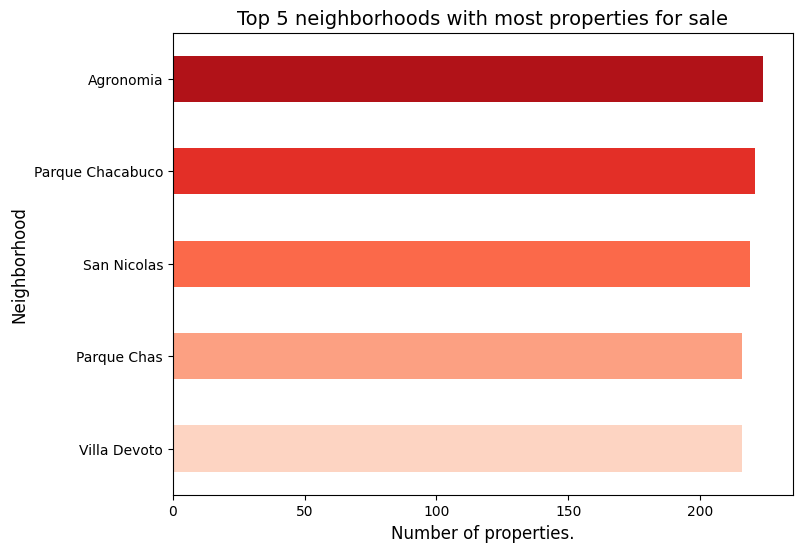

In [48]:
# Number of properties by neighborhood, select the top 5 with the most properties, and sort them in descending order

properties_neighborhood = properties.Neighborhood.value_counts().head(5).sort_values(ascending=True)

colors = sns.color_palette("Reds", len(properties_neighborhood))

plt.figure(figsize=(8, 6))
properties_neighborhood.plot(kind='barh', color=colors)

plt.title('Top 5 neighborhoods with most properties for sale', fontsize=14)
plt.xlabel('Number of properties.', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

plt.show()

## 2.Data Cleaning and Transformation

### Verification

Before starting to work with numbers, we verify the data type of the 'VALUE' column, as it contains the fundamental data for the project.

In [49]:
print(properties["Price"].head(10))

0     360000000
1     670000000
2    1120000000
3     890000000
4     970000000
5     510000000
6     500000000
7    2350000000
8     850000000
9     642000000
Name: Price, dtype: int64


The values are a bit lengthy, and since they are expressed in USD, they seem higher than they actually are. Therefore, it is most convenient to convert the 'Value' column to thousands of dollars.

In [50]:
properties['Price'] = properties['Price'] / 1000

# Convert the price column to float.

properties['Price'] = properties['Price'].astype(float)

print(properties["Price"].head(10))

0    360000.00
1    670000.00
2   1120000.00
3    890000.00
4    970000.00
5    510000.00
6    500000.00
7   2350000.00
8    850000.00
9    642000.00
Name: Price, dtype: float64


In [51]:
# Test showing the new values of a random property. USD 235,000.

properties['Price'][7]

2350000.0

### Statistics of the DataFrame

In [52]:
# Using the "describe" function, we get the statistical measures of the dataset.

properties.describe()

,Bedrooms,Bathroom,Area_m2,Price
count,9519.00,9519.00,9519.00,9519.00
mean,3.07,2.45,146.67,602090.38
std,2.05,1.26,1731.47,704633.77
min,1.00,0.00,2.00,60000.00
25%,2.00,2.00,57.00,250000.00
50%,3.00,2.00,80.00,409365.00
75%,3.00,3.00,135.00,680000.00
max,110.00,9.00,166243.00,16000000.00


### New Column (Price per m²)

Continuing with the optimization and simplification of the analysis, it would be ideal to calculate the price per square meter (m²) for each property. To do this, we will create a new column in the dataset.

In [53]:
properties["Price_per_m2"] = properties["Price"] / properties["Area_m2"]

properties.sample()

,Type,Description,Bedrooms,Bathroom,Area_m2,Neighborhood,Disctrict,Price,Price_per_m2
3709,Apartment,Apartment on sale,3,1,53,Balvanera,Disctrict 3,138000.00,2603.77


### New data frame

contenga el promedio sumado de cada item de los immuebles por barrio

In [54]:
data_neighborhood = properties.groupby("Neighborhood").sum()

data_neighborhood.sample(5)

,Type,Description,Bedrooms,Bathroom,Area_m2,Disctrict,Price,Price_per_m2
Neighborhood,,,,,,,,
Liniers,ApartmentApartmentApartmentHouseApartmentApart...,Apartment on saleApartment on saleApartment on...,603,495,24218,Disctrict 9Disctrict 9Disctrict 9Disctrict 9Di...,122599760.00,991950.13
Barracas,ApartmentApartmentApartmentApartmentApartmentA...,Apartment on saleApartment on saleApartment on...,576,446,21696,Disctrict 4Disctrict 4Disctrict 4Disctrict 4Di...,117491837.00,938090.64
Villa Santa Rita,ApartmentApartmentHouseApartmentApartmentApart...,Apartment on saleApartment on saleHouse on sal...,632,499,24204,Disctrict 11Disctrict 11Disctrict 11Disctrict ...,118261267.00,1040952.70
La Boca,HouseApartmentApartmentApartmentApartmentApart...,House on saleApartment on saleApartment on sal...,654,533,33312,Disctrict 4Disctrict 4Disctrict 4Disctrict 4Di...,127121604.32,1015250.43
Villa Real,ApartmentApartmentApartmentHouseApartmentApart...,Apartment on saleApartment on saleApartment on...,605,470,24272,Disctrict 10Disctrict 10Disctrict 10Disctrict ...,135135551.30,986949.83


Exclude the 'Description,' 'Type,' and 'District' columns before performing the grouping, as they will likely be grouped unevenly into a single row.
The 'Type' and 'Description' columns are in string format and are not relevant for the analysis, however, 'Type' column can be converted to boolean, for example: 0 = house; 1 = apartment, and can be used in the model as needed.
For now, we will remove them.

In [55]:
excluded_columns = ['Description', 'Type', 'Disctrict']

properties_new_model = properties.drop(columns=excluded_columns)

# Group by 'Neighborhood' and sum the remaining columns.

data_neighborhood = properties_new_model.groupby("Neighborhood").sum()

### Value per square meter of properties

Average value per square meter of properties according to the neighborhood in which they are located.


In [56]:
data_neighborhood["Price_m2_neighborhood"] = data_neighborhood["Price"]/data_neighborhood["Area_m2"]

data_neighborhood

,Bedrooms,Bathroom,Area_m2,Price,Price_per_m2,Price_m2_neighborhood
Neighborhood,,,,,,
Agronomia,684,550,26676,134798642.92,1123312.73,5053.18
Almagro,576,455,22310,113364667.50,916471.94,5081.34
Balvanera,617,497,24409,113984606.35,1029489.72,4669.78
Barracas,576,446,21696,117491837.00,938090.64,5415.37
Belgrano,569,441,26255,114972077.03,891699.02,4379.05
Boedo,614,498,23859,131272963.38,1044500.24,5502.03
Caballito,645,500,26046,121051784.12,971132.95,4647.62
Chacarita,574,473,24866,116289659.80,918755.64,4676.65
Coghlan,463,393,21264,100428592.13,794766.80,4722.94


In [57]:
# To optimize the queries, we will convert 'neighborhood' into a new column and assign a new index to the 'data_neighborhood' dataset.

data_neighborhood.reset_index(inplace = True)

## 3.Loading of reinforcement dataset on the socio-economic information of the city.

Let’s assume that the government has conducted surveys of the inhabitants of the 49 neighborhoods in the city of Buenos Aires, consulting topics related to infrastructure, security, cleanliness, socio-economic conditions of the area, etc. With the results, a report (dataset) has been prepared on the quality of life in the 49 neighborhoods, assigning an index to each neighborhood based on the topics addressed. This will help us begin determining the properties with the best quality-price ratio.

### Loading of New Dataset

In [58]:
# The dataset is named "indec" because that's the name of the government institute responsible for national statistics

data_indec = pd.read_csv("/content/drive/MyDrive/data_indec.csv")

data_indec.head()

,NEIGHBORHOOD_NAME,DISCTRICT_NUMBER,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,NVCBP15F,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,Villa Devoto,Comuna 11,1,2,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.00
1,La Boca,Comuna 4,1,2,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.00
2,San Nicolas,Comuna 1,2,2,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,1.00,NaN,11.00
3,Recoleta,Comuna 2,1,2,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.00
4,La Paternal,Comuna 15,1,2,2,2,2,1,2,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.00


### Replacement of Codes

As you can see, the columns have codes instead of names or characteristics that clearly identify them. Therefore, a dictionary has been created with the name/characteristic for each code to replace them and make the data more understandable.

In [59]:
dic_indec = {
    'NVCBP4': 'CONDO',
    'NVCBP14A': 'SUPERMARKETS_NEARBY',
    'NVCBP14D': 'BUS_TERMINALS',
    'NVCBP14E': 'BARS_CLUBS',
    'NVCBP14G': 'DARK_DANGEROUS',
    'NVCBP15A': 'NOISE',
    'NVCBP15C': 'INSECURITY',
    'NVCBP15F': 'DIRTY_STREETS',
    'NVCBP15G': 'PARK_SQUARE',
    'NVCBP16A3': 'ELDERLY_MOBILITY',
    'NVCBP16A4': 'CHILD_BABY_MOBILITY',
    'NPCKP17': 'OCCUPATION',
    'NPCKP18': 'CONTRACT',
    'NPCKP23': 'MONTHLY_SALARY',
    'NPCKP44A': 'WORKPLACE',
    'NPCKPN62A': 'INCOME_DECLARATION',
    'NPCKPN62B': 'DECLARED_VALUE',
    'NPCKP64A': 'JOB_LOSS',
    'NPCKP64E': 'INCOME_LOSS',
    'NHCCP3': 'HAS_DEED',
    'NHCCP6': 'YEAR_OF_PURCHASE',
    'NHCCP7': 'PURCHASE_VALUE',
    'NHCCP8_1': 'MORTGAGE_BANK_LOAN',
    'NHCCP8_2': 'OTHER_BANK_LOAN',
    'NHCCP8_3': 'FNA_LOAN',
    'NHCCP8_6': 'FRIEND_LOANS',
    'NHCCP8_7': 'SEVERANCE_FUNDS',
    'NHCCP8_8': 'SAVINGS',
    'NHCCP8_9': 'SUBSIDIES',
    'NHCCP9': 'MONTHLY_PAYMENT',
    'NHCCP11': 'PLANS_TO_BUY_HOUSE',
    'NHCCP11A': 'REASON_FOR_PURCHASE',
    'NHCCP12': 'REASON_NOT_TO_BUY_HOUSE',
    'NHCCP41': 'HAS_CAR',
    'NHCCP41A': 'NUMBER_OF_CARS',
    'NHCCP47A': 'HAS_DOGS',
    'NHCCP47B': 'HAS_CATS',
    'NHCLP2A': 'VICTIM_OF_THEFT',
    'NHCLP2B': 'VICTIM_OF_HOMICIDE',
    'NHCLP2C': 'VICTIM_OF_VANDALISM',
    'NHCLP2E': 'VICTIM_OF_HARASSMENT',
    'NHCLP4': 'HOW_ECONOMICALLY_LIVING',
    'NHCLP5': 'HOW_LIFE_LEVEL',
    'NHCLP8AB': 'POLICE_TIMELY_RESPONSE',
    'NHCLP8AE': 'URBAN_TRANSPORT_QUALITY',
    'NHCLP10': 'ARE_INCOMES_SUFFICIENT',
    'NHCLP11': 'CONSIDERS_SELF_POOR',
    'NHCLP29_1A': 'JOB_MEASURES',
    'NHCLP29_1C': 'HOUSING_CHANGE_MEASURES',
    'NHCLP29_1E': 'DEBT_MEASURES',
    'NHCLP29_1F': 'ASSET_SALE_MEASURES',
    'NPCHP4': 'EDUCATION_LEVEL'
    }

data_indec = data_indec.rename(columns=dic_indec)
data_indec.columns

Index(['NEIGHBORHOOD_NAME', 'DISCTRICT_NUMBER', 'CONDO', 'SUPERMARKETS_NEARBY',
       'BUS_TERMINALS', 'BARS_CLUBS', 'DARK_DANGEROUS', 'NOISE', 'INSECURITY',
       'DIRTY_STREETS', 'PARK_SQUARE', 'ELDERLY_MOBILITY',
       'CHILD_BABY_MOBILITY', 'OCCUPATION', 'CONTRACT', 'MONTHLY_SALARY',
       'WORKPLACE', 'INCOME_DECLARATION', 'DECLARED_VALUE', 'JOB_LOSS',
       'INCOME_LOSS', 'HAS_DEED', 'YEAR_OF_PURCHASE', 'PURCHASE_VALUE',
       'MORTGAGE_BANK_LOAN', 'OTHER_BANK_LOAN', 'FNA_LOAN', 'FRIEND_LOANS',
       'SEVERANCE_FUNDS', 'SAVINGS', 'SUBSIDIES', 'MONTHLY_PAYMENT',
       'PLANS_TO_BUY_HOUSE', 'REASON_FOR_PURCHASE', 'REASON_NOT_TO_BUY_HOUSE',
       'HAS_CAR', 'NUMBER_OF_CARS', 'HAS_DOGS', 'HAS_CATS', 'VICTIM_OF_THEFT',
       'VICTIM_OF_HOMICIDE', 'VICTIM_OF_VANDALISM', 'VICTIM_OF_HARASSMENT',
       'HOW_ECONOMICALLY_LIVING', 'HOW_LIFE_LEVEL', 'POLICE_TIMELY_RESPONSE',
       'URBAN_TRANSPORT_QUALITY', 'ARE_INCOMES_SUFFICIENT',
       'CONSIDERS_SELF_POOR', 'JOB_MEASURES', '

In [60]:
# Group and start shaping the dataset

data_indec.groupby('NEIGHBORHOOD_NAME')[['CONDO','INSECURITY','BUS_TERMINALS','BARS_CLUBS','NOISE','DARK_DANGEROUS','MONTHLY_SALARY','HAS_DEED','JOB_LOSS','INCOME_LOSS','PLANS_TO_BUY_HOUSE']].mean().head()


,CONDO,INSECURITY,BUS_TERMINALS,BARS_CLUBS,NOISE,DARK_DANGEROUS,MONTHLY_SALARY,HAS_DEED,JOB_LOSS,INCOME_LOSS,PLANS_TO_BUY_HOUSE
NEIGHBORHOOD_NAME,,,,,,,,,,,
Agronomia,1.51,1.47,1.90,1.91,1.63,1.83,2636132.98,1.09,1.94,1.74,1.89
Almagro,1.50,1.48,1.92,1.91,1.70,1.87,2634902.94,1.10,1.93,1.67,1.87
Balvanera,1.48,1.42,1.95,1.92,1.64,1.89,2512823.19,1.08,1.92,1.68,1.90
Barracas,1.39,1.41,1.88,1.90,1.64,1.83,2672999.98,1.08,1.93,1.70,1.91
Belgrano,1.43,1.46,1.91,1.91,1.69,1.84,2785829.01,1.10,1.91,1.73,1.86


In [64]:
data = data_indec[['NEIGHBORHOOD_NAME','CONDO','INSECURITY','BUS_TERMINALS','BARS_CLUBS','NOISE','DARK_DANGEROUS','MONTHLY_SALARY','HAS_DEED','JOB_LOSS','INCOME_LOSS','PLANS_TO_BUY_HOUSE']].replace(2,0)


In [65]:
trated_data = data.groupby('NEIGHBORHOOD_NAME')[['CONDO','INSECURITY','BUS_TERMINALS','BARS_CLUBS','NOISE','DARK_DANGEROUS','MONTHLY_SALARY','HAS_DEED','JOB_LOSS','INCOME_LOSS','PLANS_TO_BUY_HOUSE']].mean()


### Generate Prediction Model

Now we will merge or combine the 'datos_indec' dataset, which contains survey information, with the property dataset to generate the prediction model.

In [98]:
pd.merge(properties, trated_data, left_on = "Neighborhood", right_on = "NEIGHBORHOOD_NAME", how = "left")

,Type,Description,Bedrooms,Bathroom,Area_m2,Neighborhood,Disctrict,Price,Price_per_m2,CONDO,INSECURITY,BUS_TERMINALS,BARS_CLUBS,NOISE,DARK_DANGEROUS,MONTHLY_SALARY,HAS_DEED,JOB_LOSS,INCOME_LOSS,PLANS_TO_BUY_HOUSE
0,Apartment,Apartment on sale,3,2,70,Villa Devoto,Disctrict 11,360000.00,5142.86,0.58,0.54,0.08,0.09,0.38,0.16,2257493.23,0.87,0.06,0.27,0.15
1,House,House on sale,4,3,170,La Boca,Disctrict 4,670000.00,3941.18,0.48,0.56,0.07,0.10,0.35,0.19,2848553.22,0.90,0.06,0.23,0.13
2,Apartment,Apartment on sale,3,3,144,San Nicolas,Disctrict 1,1120000.00,7777.78,0.52,0.53,0.07,0.13,0.32,0.13,2448185.70,0.89,0.05,0.29,0.13
3,Apartment,Apartment on sale,3,2,154,Recoleta,Disctrict 2,890000.00,5779.22,0.52,0.57,0.07,0.09,0.38,0.16,2609371.68,0.87,0.09,0.34,0.16
4,Apartment,Apartment on sale,2,3,128,La Paternal,Disctrict 15,970000.00,7578.12,0.56,0.58,0.06,0.11,0.37,0.17,2472778.21,0.92,0.08,0.29,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514,Apartment,Apartment on sale,3,2,70,Retiro,Disctrict 1,290000.00,4142.86,0.58,0.58,0.08,0.12,0.34,0.14,2454588.98,0.91,0.06,0.28,0.06
9515,Apartment,Apartment on sale,2,2,100,Boedo,Disctrict 5,670000.00,6700.00,0.55,0.55,0.10,0.17,0.39,0.19,2226862.62,0.86,0.08,0.24,0.12
9516,Local,Local on sale,8,6,383,Villa Soldati,Disctrict 8,900000.00,2349.87,0.56,0.64,0.08,0.10,0.40,0.17,2759089.61,0.91,0.07,0.31,0.11
9517,House,House on sale,3,2,183,Liniers,Disctrict 9,335000.00,1830.60,0.53,0.60,0.11,0.11,0.34,0.16,2848265.07,0.92,0.10,0.34,0.14


Store this new dataset in a new variable that we will use for the machine learning model.

In [99]:
ml_data = pd.merge(properties, trated_data, left_on = "Neighborhood", right_on = "NEIGHBORHOOD_NAME", how = "left")


Since the 'neighborhood' column is in string format and we need numerical values for the regression model, we will replace these strings with the identification code for each neighborhood (for example, the CPA from the Argentine postal service could be used to better identify the location). I will use random codes to simplify the project, but it can certainly be improved.

In [100]:
print(ml_data.shape)

(9519, 20)


In [101]:
id_codes = pd.read_csv("/content/drive/MyDrive/hood_id.csv")

ml_data = pd.merge(ml_data, id_codes, left_on = "Neighborhood", right_on = "NEIGHBORHOOD_NAME", how = "inner")


### Distribution Chart

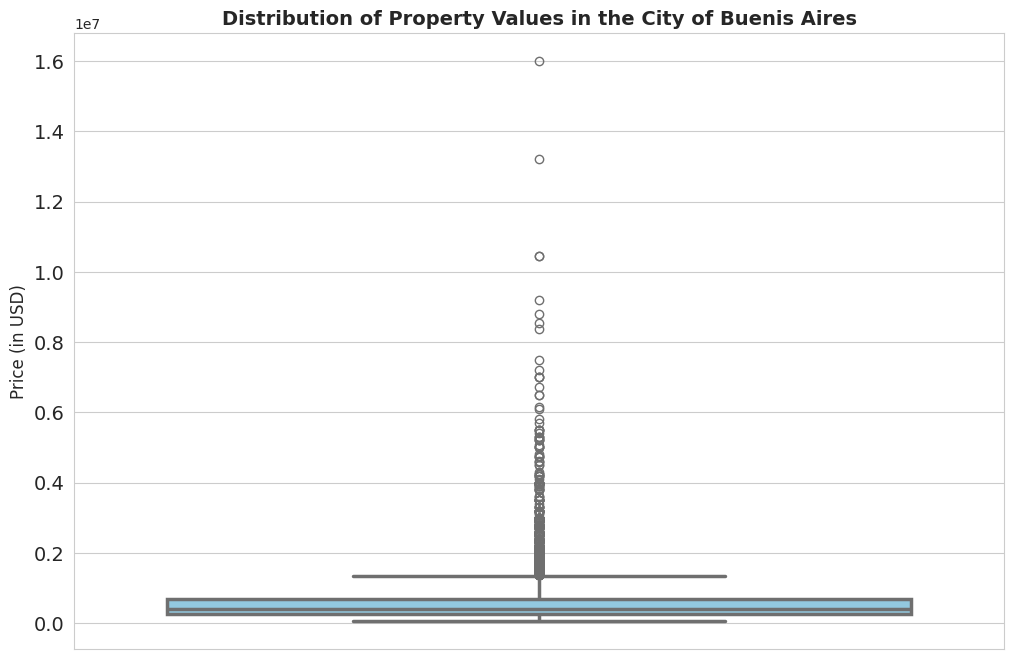

In [102]:
# Change the graph style
sns.set_style("whitegrid")

# Create a larger figure for better visualization
plt.figure(figsize=(12, 8))

# Create a boxplot with a custom color and a thicker line width
sns.boxplot(data=ml_data, y= "Price", color="skyblue", linewidth=2.5)

# Title and labels
plt.title("Distribution of Property Values in the City of Buenis Aires", fontsize=14, weight='bold')
plt.ylabel("Price (in USD)", fontsize=12)
plt.xlabel("")  # Leave blank if there’s no label for the x-axis

# Adjust the ticks (values on the axes)
plt.yticks(fontsize=14)

# Show the graph
plt.show()


Remove outliers, as there are properties well above the average and some well below.

In [103]:
ml_data = ml_data.query('Price < 4000000 & Price > 60000')

print(ml_data.shape)

(8049, 22)


Additionally, the 'monthly_salary' column for the people living in each neighborhood is expressed in pesos per month. Since property prices are in USD, we will do the same with the salaries for a better analysis. Therefore, we will create a new column for annual salary, expressed in thousands of dollars.

In [104]:
ml_data["MONTHLY_SALARY_USD"] = ml_data["MONTHLY_SALARY"] * 12/ 1000

## 4.Determination of optimal variables for the machine learning model

### Correlation of variables

To improve visualization, we will implement a heatmap and begin delving into machine learning. The goal is to determine which variables have the most and the least impact on property prices.

Text(0.5, 1.0, 'Correlation of Variables')

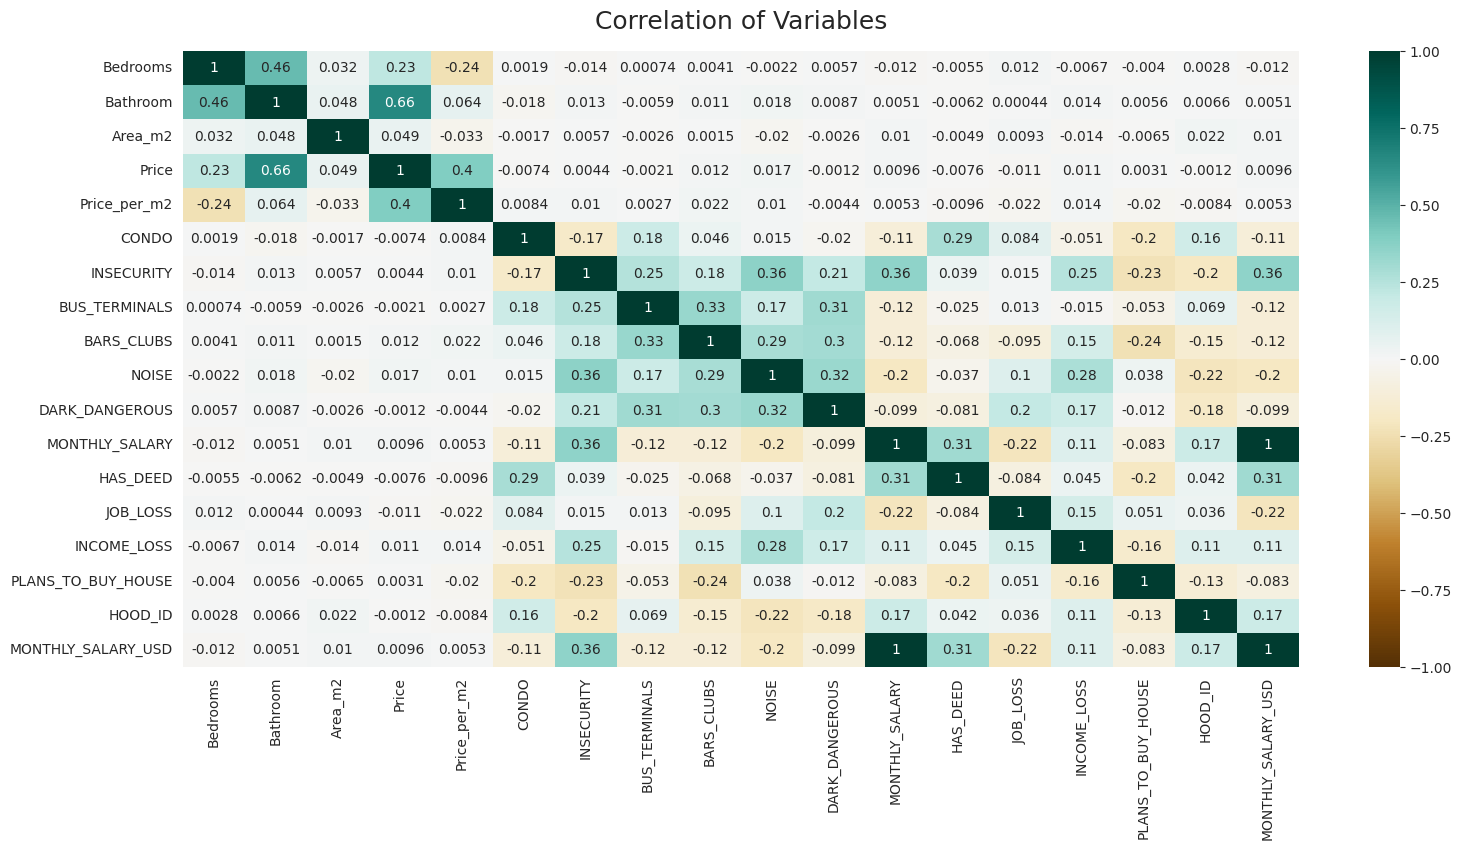

In [105]:
plt.figure(figsize=(18, 8))

heatmap = sns.heatmap(ml_data.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation of Variables', fontdict={'fontsize':18}, pad=16)

### Scikit-learn

Import sklearn to start with machine learning. With this, we can:

* Train a model: This means you give the program past data so it can learn to find patterns (for example, how house prices depend on size or neighborhood).
* Make predictions: Once the program has 'learned,' you can give it new data to predict the price of a house.

In [106]:
# Linear regression package, which we are going to use

from sklearn.linear_model import LinearRegression

# Package to train the model and then add new metrics

from sklearn.model_selection import train_test_split

X = ml_data[["HOOD_ID"]]

y = ml_data[["Price"]]

# We determine the split, the training and test variables, the test size, and the randomness of the test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

In [107]:
# It corresponds to 75% of the data

X_train

,HOOD_ID
861,109.00
6632,76.00
6329,37.00
366,100.00
545,65.00
...,...
4750,42.00
2019,810.00
228,100.00
2780,73.00


In [108]:
# It corresponds to 25% of the data.

X_test

,HOOD_ID
5224,74.00
1431,814.00
4118,817.00
553,65.00
7631,71.00
...,...
4338,807.00
7483,816.00
2799,73.00
565,65.00


In [109]:
y_train

,Price
861,690000.00
6632,370000.00
6329,960000.00
366,470000.00
545,1000000.00
...,...
4750,470000.00
2019,285000.00
228,750000.00
2780,225000.00


In [110]:
y_test

,Price
5224,850000.00
1431,750000.00
4118,560000.00
553,1490000.00
7631,315000.00
...,...
4338,310000.00
7483,3500000.00
2799,495000.00
565,550000.00


### Linear Regression

Add linear regression to the analysis

In [111]:
model = LinearRegression()

Fit the model


In [112]:
model.fit(X_train, y_train)

LinearRegression()

In the previous step, the model is already trained, and the machine learning model has been applied. Now it’s time to validate this model and/or the data and variables. We are now going to make predictions to later compare or verify if the predicted values are similar to the actual ones, in order to check the model's effectiveness.

In [113]:
y_predict = model.predict(X_test)

y_test & y_train: Validation begins, applying metrics or indicators (Mean Absolute Error and R²) to evaluate the model's performance.

Mean Absolute Error: The expected error or margin of error in the model's prediction (the lower, the better).
R²: Coefficient of determination, where values closer to 1 indicate that the model fits well (i.e., has good variables/information for prediction).

In [114]:
from sklearn.metrics import mean_absolute_error, r2_score

# Compare what was predicted by the machine learning model with the dataset that was not fed into the model

baseline_mae = mean_absolute_error(y_test, y_predict)

baseline_r2 = r2_score(y_test, y_predict)

These indicators show that the model is not fitting or performing optimally.

In [115]:
print(baseline_mae, baseline_r2)

341769.12157219375 2.840578829599316e-06


We need to add higher-quality variables to try to improve the model fit


In [119]:
X = ml_data[['HOOD_ID','Bedrooms','Bathroom', 'CONDO','MONTHLY_SALARY_USD','HAS_DEED']]

Y = ml_data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)

modelo_2 = LinearRegression()

modelo_2.fit(X_train, y_train)

y_predict_test = modelo_2.predict(X_test)

y_predict_train = modelo_2.predict(X_train)

mae_test_2 = mean_absolute_error(y_test, y_predict_test)

r2_test_2 = r2_score(y_test, y_predict_test)

mae_train_2 = mean_absolute_error(y_train, y_predict_train)

r2_train_2 = r2_score(y_train, y_predict_train)

print(mae_test_2,r2_test_2)

print(mae_train_2,r2_train_2)

222854.50049815868 0.41723654176537806
225014.89563958358 0.4567069816893512


## 5.Results

The model now fits better, with a higher prediction confidence.
We test the model by providing information on the relevant variables to estimate the price of a property in neighborhood code 44 (Puerto Madero) with 3 bedrooms, 2 bathrooms, in a condominium, earning USD 3,000 annually, and with a deed.

In [120]:
modelo_2.predict([[816,3,2,1,3000,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[406499.44385319]])

The property with these characteristics is priced at **USD 406.499,44**

Now, we test by querying a more affordable area, neighborhood code 73 (Villa Riachuelo) with 1 bedroom, 1 bathroom, in a condominium, earning USD 1,000 annually, and with a deed.

In [121]:
modelo_2.predict([[73,1,1,1,1000,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[151719.58149749]])

The property with these characteristics is priced at **USD 151.719,58**